<a href="https://colab.research.google.com/github/Mojgunsh/Final_Project/blob/master/Final_Project_Vr0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libaraies

In [125]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay,cohen_kappa_score
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.callbacks import EarlyStopping # This callback allows you to stop the training if the validation error increases
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf # Library to construct neural newtorks. Low level library
from tensorflow import keras # High level library to handle tensorflow.
from tensorflow.keras.layers import Flatten, Dense, Dropout # Types of layers to use in our neural network.


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading and Exploring Data

In [16]:
data=pd.read_csv('/content/drive/MyDrive/IRONHACK/Final_Project/Dataset/Data_Base(Modeified).csv')

In [17]:
data.tail()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate
4423,1,10,1,9773,1,1,152.0,22,38,37,...,0,6,6,6,13.000000,0,12.7,3.7,-1.70,Graduate


In [51]:
data.shape

(4424, 37)

In [18]:
#looking fo Nan Values
data.isna().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [19]:
#Modifiying Column names
data.columns = list(map(lambda x: x.lower(), data.columns))
data.columns = data.columns.str.replace(" ","_")
data.columns = data.columns.str.replace("'s","")

# Dividing Categorical and Numerical 

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   marital_status                                  4424 non-null   int64  
 1   application_mode                                4424 non-null   int64  
 2   application_order                               4424 non-null   int64  
 3   course                                          4424 non-null   int64  
 4   daytime/evening_attendance                      4424 non-null   int64  
 5   previous_qualification                          4424 non-null   int64  
 6   previous_qualification_(grade)                  4424 non-null   float64
 7   nacionality                                     4424 non-null   int64  
 8   mother_qualification                            4424 non-null   int64  
 9   father_qualification                     

In [55]:
# find out the number of value for each fild based on the meta data of data base most of these features are Categorical Nominal
for i in range (len(data.columns)):
    print(data.iloc[:,[i]].value_counts())
    print('*'*50)


marital_status
1                 3919
2                  379
4                   91
5                   25
6                    6
3                    4
dtype: int64
**************************************************
application_mode
1                   1708
17                   872
39                   785
43                   312
44                   213
7                    139
18                   124
42                    77
51                    59
16                    38
53                    35
15                    30
5                     16
10                    10
2                      3
26                     1
27                     1
57                     1
dtype: int64
**************************************************
application_order
1                    3026
2                     547
3                     309
4                     249
5                     154
6                     137
0                       1
9                       1
dtype: int64
*************

''' 
Based On EXploring data These features are numercial 
gdp
inflation_rate,
unemployment_rate,
curricular_units_2nd_sem_(without_evaluations
curricular_units_2nd_sem_(grade)
curricular_units_2nd_sem_(approved)
curricular_units_2nd_sem_(evaluations)
curricular_units_2nd_sem_(enrolled)
curricular_units_2nd_sem_(credited)
curricular_units_1st_sem_(without_evaluations)
curricular_units_1st_sem_(without_evaluations)
curricular_units_1st_sem_(grade)
curricular_units_1st_sem_(approved)
curricular_units_1st_sem_(evaluations)
curricular_units_1st_sem_(enrolled)
curricular_units_1st_sem_(credited)
age_at_enrollment
admission_grade
previous_qualification_(grade)
previous_qualification

In [56]:
data.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime/evening_attendance', 'previous_qualification',
       'previous_qualification_(grade)', 'nacionality', 'mother_qualification',
       'father_qualification', 'mother_occupation', 'father_occupation',
       'admission_grade', 'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_1st_sem_(without_evaluations)',
       'curricular_units_2nd_sem_(credited)',
       'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(approved)',
       'curricular_units_2nd_sem_(grade)',
  

In [21]:
# Change Type of Others to Objects
data[['marital_status', 'application_mode', 'application_order', 'course',
       'daytime/evening_attendance','nacionality', 'mother_qualification',
       'father_qualification', 'mother_occupation', 'father_occupation',
        'displaced', 'educational_special_needs', 'debtor','tuition_fees_up_to_date',
        'gender', 'scholarship_holder', 'international']] = data[['marital_status', 'application_mode', 'application_order', 'course',
       'daytime/evening_attendance','nacionality', 'mother_qualification',
       'father_qualification', 'mother_occupation', 'father_occupation',
        'displaced', 'educational_special_needs', 'debtor','tuition_fees_up_to_date',
        'gender', 'scholarship_holder', 'international']].astype('object')


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   marital_status                                  4424 non-null   object 
 1   application_mode                                4424 non-null   object 
 2   application_order                               4424 non-null   object 
 3   course                                          4424 non-null   object 
 4   daytime/evening_attendance                      4424 non-null   object 
 5   previous_qualification                          4424 non-null   int64  
 6   previous_qualification_(grade)                  4424 non-null   float64
 7   nacionality                                     4424 non-null   object 
 8   mother_qualification                            4424 non-null   object 
 9   father_qualification                     

# Divide Numercial and Categorical

In [24]:
num=data.select_dtypes(np.number)
cat=data.select_dtypes('object')


In [25]:
num.shape

(4424, 19)

In [26]:
cat.shape

(4424, 18)

In [27]:
list(num.columns)

['previous_qualification',
 'previous_qualification_(grade)',
 'admission_grade',
 'age_at_enrollment',
 'curricular_units_1st_sem_(credited)',
 'curricular_units_1st_sem_(enrolled)',
 'curricular_units_1st_sem_(evaluations)',
 'curricular_units_1st_sem_(approved)',
 'curricular_units_1st_sem_(grade)',
 'curricular_units_1st_sem_(without_evaluations)',
 'curricular_units_2nd_sem_(credited)',
 'curricular_units_2nd_sem_(enrolled)',
 'curricular_units_2nd_sem_(evaluations)',
 'curricular_units_2nd_sem_(approved)',
 'curricular_units_2nd_sem_(grade)',
 'curricular_units_2nd_sem_(without_evaluations)',
 'unemployment_rate',
 'inflation_rate',
 'gdp']

# Numericals

## Find Multicollinearity in Numricals

In [28]:
considered_features = list(num.columns)
def compute_vif(considered_features):
    X = num[considered_features]
    X['intercept'] = 1
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='intercept']
    return vif
compute_vif(considered_features)
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
5,curricular_units_1st_sem_(enrolled),23.528216
11,curricular_units_2nd_sem_(enrolled),16.442303
4,curricular_units_1st_sem_(credited),15.747238
7,curricular_units_1st_sem_(approved),12.676006
10,curricular_units_2nd_sem_(credited),12.399341
13,curricular_units_2nd_sem_(approved),10.154983
14,curricular_units_2nd_sem_(grade),5.479099
8,curricular_units_1st_sem_(grade),4.980663
6,curricular_units_1st_sem_(evaluations),3.976740
12,curricular_units_2nd_sem_(evaluations),3.330090


## Removing Multicollinearity

In [29]:
considered_features.remove('curricular_units_1st_sem_(enrolled)')
compute_vif(considered_features)
compute_vif(considered_features).sort_values('VIF', ascending=False)

,Variable,VIF
4,curricular_units_1st_sem_(credited),12.656257
9,curricular_units_2nd_sem_(credited),11.405488
6,curricular_units_1st_sem_(approved),11.223404
12,curricular_units_2nd_sem_(approved),9.615539
13,curricular_units_2nd_sem_(grade),5.453835
7,curricular_units_1st_sem_(grade),4.884174
10,curricular_units_2nd_sem_(enrolled),3.529162
5,curricular_units_1st_sem_(evaluations),3.432251
11,curricular_units_2nd_sem_(evaluations),3.177420
8,curricular_units_1st_sem_(without_evaluations),1.677744


In [30]:
considered_features.remove('curricular_units_1st_sem_(credited)')
compute_vif(considered_features)
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Variable,VIF
11,curricular_units_2nd_sem_(approved),8.773690
5,curricular_units_1st_sem_(approved),8.762912
12,curricular_units_2nd_sem_(grade),5.430531
6,curricular_units_1st_sem_(grade),4.650342
9,curricular_units_2nd_sem_(enrolled),3.509112
4,curricular_units_1st_sem_(evaluations),3.285054
8,curricular_units_2nd_sem_(credited),3.211705
10,curricular_units_2nd_sem_(evaluations),3.139909
7,curricular_units_1st_sem_(without_evaluations),1.677152
2,admission_grade,1.602561


In [31]:
considered_features.remove('curricular_units_2nd_sem_(approved)')
compute_vif(considered_features)
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Variable,VIF
5,curricular_units_1st_sem_(approved),5.857220
6,curricular_units_1st_sem_(grade),4.525994
11,curricular_units_2nd_sem_(grade),3.832838
4,curricular_units_1st_sem_(evaluations),3.278628
8,curricular_units_2nd_sem_(credited),3.181203
9,curricular_units_2nd_sem_(enrolled),3.134100
10,curricular_units_2nd_sem_(evaluations),3.038389
7,curricular_units_1st_sem_(without_evaluations),1.676292
2,admission_grade,1.599957
12,curricular_units_2nd_sem_(without_evaluations),1.567375


In [32]:
considered_features.remove('curricular_units_1st_sem_(approved)')
compute_vif(considered_features)
compute_vif(considered_features).sort_values('VIF', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Variable,VIF
5,curricular_units_1st_sem_(grade),3.767078
10,curricular_units_2nd_sem_(grade),3.484976
4,curricular_units_1st_sem_(evaluations),3.262878
9,curricular_units_2nd_sem_(evaluations),3.031362
8,curricular_units_2nd_sem_(enrolled),2.686019
7,curricular_units_2nd_sem_(credited),2.206704
6,curricular_units_1st_sem_(without_evaluations),1.675945
2,admission_grade,1.599179
11,curricular_units_2nd_sem_(without_evaluations),1.558737
1,previous_qualification_(grade),1.542052


In [33]:
#Drop multiculinarity from Numerical
num=num.drop(['curricular_units_1st_sem_(enrolled)',
             'curricular_units_1st_sem_(credited)',
             'curricular_units_2nd_sem_(approved)',
             'curricular_units_1st_sem_(approved)'],axis=1)

## Removing Outliers

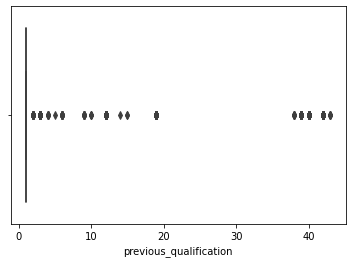

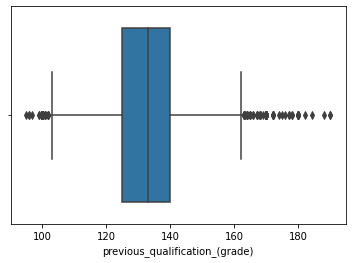

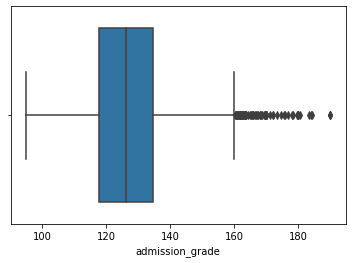

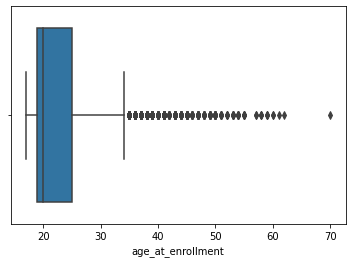

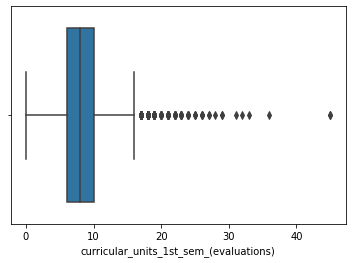

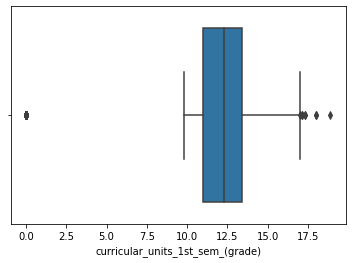

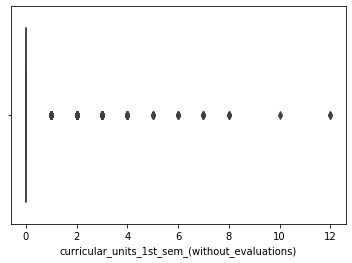

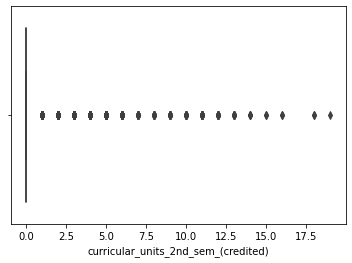

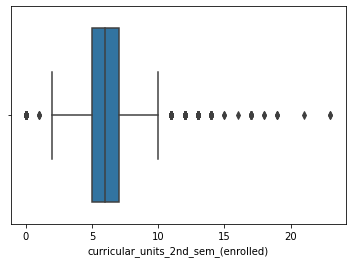

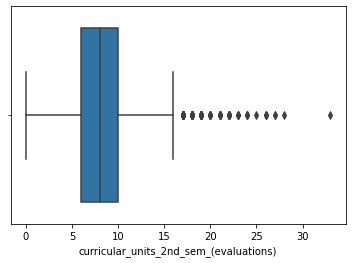

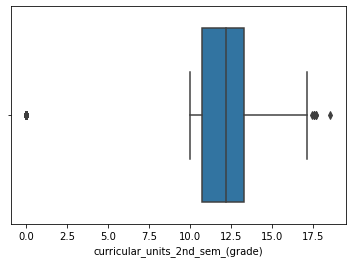

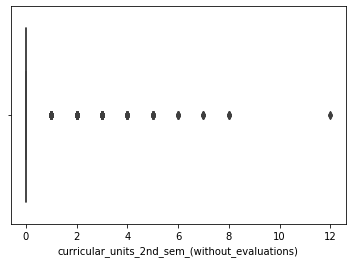

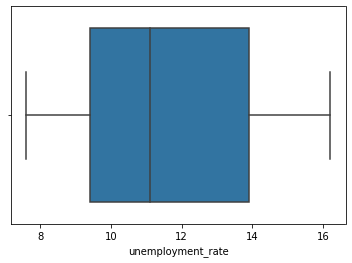

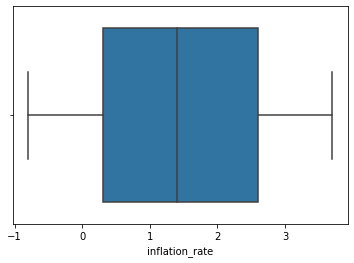

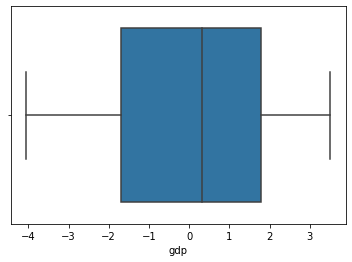

In [34]:
def plot_num(df):
    col=list(df.columns)
    for i in range(len(col)):
        sns.boxplot(x =df[col[i]], data = df) 
        plt.show()
plot_num(num)

In [35]:
# Age
num[num['age_at_enrollment']>65]['age_at_enrollment'].value_counts()
num=num[num['age_at_enrollment']<=65]
num.shape

(4423, 15)

In [36]:
num.columns

Index(['previous_qualification', 'previous_qualification_(grade)',
       'admission_grade', 'age_at_enrollment',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_1st_sem_(without_evaluations)',
       'curricular_units_2nd_sem_(credited)',
       'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(grade)',
       'curricular_units_2nd_sem_(without_evaluations)', 'unemployment_rate',
       'inflation_rate', 'gdp'],
      dtype='object')

# Categorical

In [37]:
def plot_cat(df):
    col=list(df.columns)
    fig,ax=plt.subplots(int(np.ceil(len(col)/2)),2 ,figsize=(15,25))
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.5)
    j=0
    k=0
    for i in range(len(col)):
        chart=sns.countplot(x=df[col[i]],data=df,ax=ax[j,k])
        chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
        k=k+1
        if k>=2:
            j=j+1
            k=0

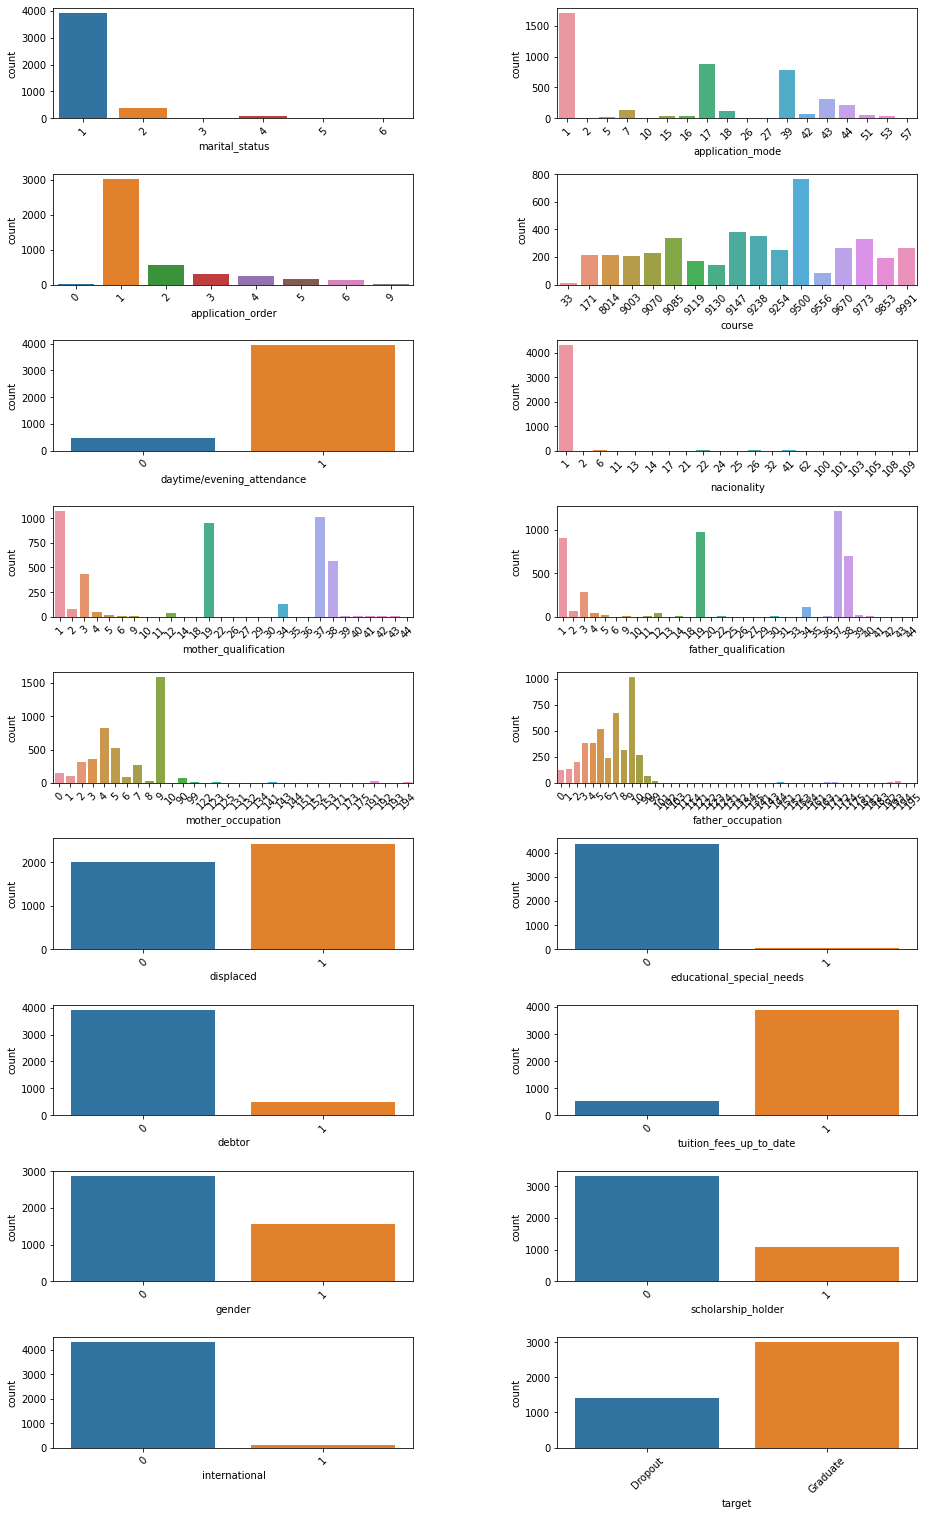

In [38]:
plot_cat(cat)

# X,Y

In [39]:
# Removing rows in cat which we delete in numerical removing outliers
#cat.loc[cat.index.isin(numerical.index),'HandsetPrice'] = numerical.HandsetPrice
cols=cat.columns
cat_df = pd.DataFrame(cat, columns=cols, index =num.index)
num_df=num
print(cat_df.shape)
print(num_df.shape)

(4423, 18)
(4423, 15)


In [40]:
X=pd.concat([cat_df,num_df], axis=1) 
Y=X['target']
X=X.drop('target',axis=1)
X.shape


(4423, 32)

# Train & Test Split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Normalizing

In [42]:
def normal(name,X_train,y_train,X_test,y_test):
    
    while ( name not in ['MinMaxScaler','PowerTransformer','StandardScaler']):
        value = input("Incorrect transformer name, please enter a valid one: [1:'MinMaxScaler',2:'PowerTransformer',3:'StandardScaler']")
        if ( value == '1'):
            name = "MinMaxScaler"
        elif ( value == '2'):
            name = "PowerTransformer"
        elif ( value == "3"):
            name = "StandardScaler"
        else:
            name = None
    X_train_df = pd.DataFrame(X_train, columns=X.columns)
    X_test_df  = pd.DataFrame(X_test,  columns=X.columns)
    X_train_num = X_train_df.select_dtypes(include = np.number)
    X_test_num  = X_test_df.select_dtypes(include = np.number)
    X_train_cat = X_train_df.select_dtypes(include = 'object')
    X_test_cat  = X_test_df.select_dtypes(include = 'object')  
    encoder = OneHotEncoder(drop='first',handle_unknown='ignore')
    encoder.fit(X_train_cat)
    
    X_train_cat_encoded = encoder.transform(X_train_cat).toarray()
    cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
    X_train_encoded_df = pd.DataFrame(X_train_cat_encoded, columns=cols, index = X_train_cat.index)
    X_train_encoded = pd.concat([X_train_encoded_df,X_train_num], axis=1)
    
    X_test_cat_encoded = encoder.transform(X_test_cat).toarray()
    X_test_cat_encoded_df = pd.DataFrame(X_test_cat_encoded,columns=cols, index = X_test_cat.index)
    X_test_encoded = pd.concat([X_test_cat_encoded_df,X_test_num], axis=1)
        
    if name=="MinMaxScaler":
        transformer = MinMaxScaler()
        transformer.fit(X_train_encoded)
    elif name=="PowerTransformer":
        transformer = PowerTransformer()
        transformer.fit(X_train_encoded)
    elif name=='StandardScaler':
        transformer = StandardScaler()
        transformer.fit(X_train_encoded)
        
    X_train_scaled_total = transformer.transform(X_train_encoded)
    X_train_scaled_total_df = pd.DataFrame(X_train_scaled_total, columns = X_train_encoded.columns)
    X_test_scaled_total  = transformer.transform(X_test_encoded)
    X_test_scaled_total_df = pd.DataFrame(X_test_scaled_total, columns= X_test_encoded.columns)

    
    return X_train_scaled_total_df, X_test_scaled_total_df

In [90]:
X_train, X_test=normal('MinMaxScaler',X_train,y_train,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [7, 8, 9] during transform. These unknown categories will be encoded as all zeros
  UserWarning,


In [91]:
sum(X_train.isna().sum())

0

In [92]:
y_train.isna().sum()

0

In [93]:
y_train.shape

(3538,)

In [94]:
y_test.shape

(885,)

# UP Sampling

In [95]:
#We have Class inbalance so we are foing to do Upsampling
data['target'].value_counts()

Graduate    3003
Dropout     1421
Name: target, dtype: int64

In [96]:
trainset = pd.concat([X_train.reset_index(drop=True), y_train.reset_index(drop=True)], axis=1)
# Manual way to Upsampling Dropout:
category_G = trainset[trainset['target']=='Graduate']
print(category_G.shape)
category_D = trainset[trainset['target']== 'Dropout' ]
print(category_D.shape)
category_up=category_D.sample(len(trainset[trainset['target']=='Graduate']),replace=True)
print(category_up.shape)

(2403, 218)
(1135, 218)
(2403, 218)


In [85]:
sum(X_train.isna().sum())

0

In [97]:
# Concatinate and Train & test Spli
#concatinate
trainset_new = pd.concat([category_G, category_up], axis = 0)
trainset_new = trainset_new.sample(frac =1) #randomize the rows
X_train_up = trainset_new.drop(['target'], axis=1)
y_train_up = trainset_new['target']
#data = data.reset_index(drop=True)
print(X_train_up.shape)
print(X_test.shape)
print(y_train_up.shape)
print(y_test.shape)

(4806, 217)
(885, 217)
(4806,)
(885,)


In [98]:
sum(X_train_up.isna().sum())

0

# Predictions

## RandomForestClassifier

In [88]:
rfc = RandomForestClassifier(max_depth=3,
                             min_samples_split=4,
                             min_samples_leaf =2,
                             max_samples=0.5,
                             random_state = 10)
rfc.fit(X_train_up, y_train_up)



RandomForestClassifier(max_depth=3, max_samples=0.5, min_samples_leaf=2,
                       min_samples_split=4, random_state=10)

In [89]:
print("The accuracy for the Random Forest in the TRAIN set is {:.2f}".format(rfc.score(X_train_up, y_train_up)))
print("The accuracy for the Random Forest in the TEST  set is {:.2f}".format(rfc.score(X_test, y_test)))

y_pred = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train_up)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))
conf_m=confusion_matrix(y_test, y_pred)

The accuracy for the Random Forest in the TRAIN set is 0.81
The accuracy for the Random Forest in the TEST  set is 0.84


Graduate    600
Dropout     285
Name: target, dtype: int64

array([[204,  81],
       [ 62, 538]])

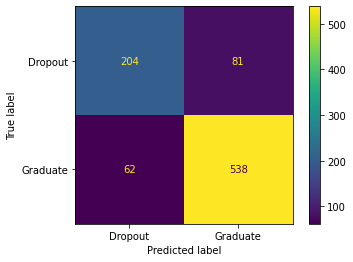

In [90]:
cm_train = confusion_matrix(y_test,y_pred)
cm_train
disp = ConfusionMatrixDisplay(cm_train,display_labels=rfc.classes_);
disp.plot()
plt.show()

## Grid Search

In [91]:
param_grid = {
    'n_estimators' : [100, 300],
    'min_samples_split': [3, 5, 10], 
    'max_features': [3, 5, 10, 20],
    'max_depth': [3, 5, 15, 25]
}
model = RandomForestClassifier()

In [192]:
precision_score=make_scorer(precision_score,greater_is_better=True,pos_label="Dropout")
recall_scorer = make_scorer(recall_score, greater_is_better=True,pos_label="Dropout")
kappa_scorer= make_scorer(cohen_kappa_score,greater_is_better=True)

In [93]:
grid_search = GridSearchCV(estimator = model, param_grid =param_grid , cv = 5,scoring=recall_scorer, verbose=10, refit=True,n_jobs=100)
grid_search.fit(X_train_up.values, y_train_up.values)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=100,
             param_grid={'max_depth': [3, 5, 15, 25],
                         'max_features': [3, 5, 10, 20],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [100, 300]},
             scoring=make_scorer(recall_score, pos_label=Dropout), verbose=10)

In [94]:
grid_search.best_params_

{'max_depth': 25,
 'max_features': 20,
 'min_samples_split': 3,
 'n_estimators': 300}

In [95]:
rfc = RandomForestClassifier(max_depth=3,
                             max_features= 3,
                             min_samples_split=3,
                             n_estimators=100,
                             )
rfc.fit(X_train_up, y_train_up)

RandomForestClassifier(max_depth=3, max_features=3, min_samples_split=3)

In [96]:
y_pred = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train_up)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))
conf_m=confusion_matrix(y_test, y_pred)

Graduate    600
Dropout     285
Name: target, dtype: int64

array([[209,  76],
       [106, 494]])

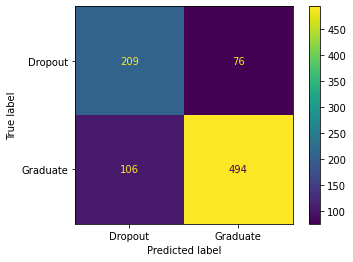

In [97]:
cm_train = confusion_matrix(y_test,y_pred)
cm_train
disp = ConfusionMatrixDisplay(cm_train,display_labels=rfc.classes_);
disp.plot()
plt.show()

In [98]:
param_grid = {
    'min_samples_split' : [2,3,4,5],
    'min_samples_leaf': [2,3,4], 
    'max_samples': [0.25,0.5], 
    'random_state' :[5,10,20,30],
    'max_features': [3, 5, 10, 20],
    'max_depth': [3, 5, 15, 25]
}
model = RandomForestClassifier()

In [99]:
grid_search = GridSearchCV(estimator = model, param_grid =param_grid , cv = 5,scoring=recall_scorer, verbose=10, refit=True,n_jobs=12)
grid_search.fit(X_train_up.values, y_train_up.values)

Fitting 5 folds for each of 1536 candidates, totalling 7680 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=12,
             param_grid={'max_depth': [3, 5, 15, 25],
                         'max_features': [3, 5, 10, 20],
                         'max_samples': [0.25, 0.5],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5],
                         'random_state': [5, 10, 20, 30]},
             scoring=make_scorer(recall_score, pos_label=Dropout), verbose=10)

In [100]:
grid_search.best_params_

{'max_depth': 25,
 'max_features': 20,
 'max_samples': 0.5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'random_state': 5}

In [101]:
rfc = RandomForestClassifier(max_depth= 25,
                            max_features =20,
                            max_samples= 0.5,
                            min_samples_leaf =2,
                            min_samples_split=2,
                            random_state=5,
                             )
rfc.fit(X_train_up, y_train_up)

RandomForestClassifier(max_depth=25, max_features=20, max_samples=0.5,
                       min_samples_leaf=2, random_state=5)

In [102]:
y_pred = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train_up)
display(y_test.value_counts())
display(confusion_matrix(y_test, y_pred))
conf_m=confusion_matrix(y_test, y_pred)

Graduate    600
Dropout     285
Name: target, dtype: int64

array([[215,  70],
       [ 50, 550]])

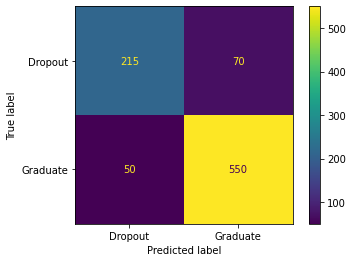

In [103]:
cm_train = confusion_matrix(y_test,y_pred)
cm_train
disp = ConfusionMatrixDisplay(cm_train,display_labels=rfc.classes_);
disp.plot()
plt.show()

In [136]:
print("The accuracy of in the TEST  set is: {:.3f}".format(accuracy_score(y_test, y_pred)))
print("The recall_score for the DecisionTree in the Train set is  "+ str(round(recall_score(y_test, y_pred,pos_label='Dropout'),2)))
print("The kappa in of the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred)))
print("The precision_score for the DecisionTree in the Train set is  "+ str(round(precision_score(y_test,y_pred,pos_label='Dropout'),2)))

The accuracy of in the TEST  set is: 0.864
The recall_score for the DecisionTree in the Train set is  0.75
The kappa in of the TEST set is: 0.68
The precision_score for the DecisionTree in the Train set is  0.81


## Important Featurs

In [158]:
importances = rfc.feature_importances_
importances

array([3.46872965e-03, 0.00000000e+00, 1.00339612e-03, 2.24207684e-04,
       8.41625951e-05, 0.00000000e+00, 3.04957061e-05, 2.70715968e-03,
       1.14879823e-04, 6.72551404e-04, 3.64724999e-04, 5.42812457e-03,
       1.60632963e-03, 3.77839387e-05, 3.39636281e-05, 1.06019323e-02,
       9.03585956e-04, 3.52546207e-03, 1.55111414e-03, 1.07184176e-03,
       5.97612415e-04, 0.00000000e+00, 5.77035380e-03, 3.71220810e-03,
       2.51995948e-03, 2.32998381e-03, 1.01194183e-03, 1.48464028e-03,
       0.00000000e+00, 7.08435331e-03, 1.96748734e-03, 1.60219212e-03,
       2.14936040e-03, 2.87477539e-03, 5.41980533e-03, 4.68657862e-03,
       3.02596278e-03, 4.50349699e-03, 3.21378619e-03, 1.17028111e-02,
       1.34511119e-03, 2.43067598e-03, 3.68939858e-03, 5.73853310e-03,
       2.53585688e-03, 3.41641771e-03, 0.00000000e+00, 1.18950322e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.89739737e-06, 0.00000000e+00, 0.00000000e+00,
      

In [185]:
keys_list=list(X_test.columns)
values_list=list(importances)
zip_iterator = zip(keys_list, values_list)
important = dict(zip_iterator)

In [ ]:
important

In [192]:
imoprtant_features = pd.DataFrame(important.items(), columns=['features', 'score'])

In [197]:
imoprtant_features.sort_values(by='score', ascending=False )
imoprtant_features.to_csv('/content/drive/MyDrive/IRONHACK/Final_Project/imoprtant_features.csv')

## Neural Network

In [5]:
#Because Neural network is sensetive to Scale we need to Normilize with Powertransformation

### Normalizing

In [45]:
X_train_p, X_test_p=normal('PowerTransformer',X_train,y_train,X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_encoders.py:174: UserWarning: Found unknown categories in columns [7, 8, 9] during transform. These unknown categories will be encoded as all zeros
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


###MLPClassifier

In [52]:
from sklearn import preprocessing
# Creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
y_train_label=le.fit_transform(y_train)

array([1, 1, 1, ..., 1, 0, 0])

In [147]:
from sklearn.neural_network import MLPClassifier

# Create model object
clf = MLPClassifier(hidden_layer_sizes=(100,50,25,12,2),
  activation='relu',
  solver='adam',
  alpha=0.0001, 
  batch_size='auto', 
  learning_rate='constant', 
  learning_rate_init=0.001,
  power_t=0.5,
  max_iter=200,
  shuffle=True,
  random_state=None,
  tol=0.0001, 
  verbose=False,
  warm_start=False, 
  momentum=0.9,
  nesterovs_momentum=True,
  early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
# Fit data onto the model
clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(100, 50, 25, 12, 2))

In [148]:
y_pred_n=clf.predict(X_test)
print("The accuracy of in the TEST  set is: {:.3f}".format(accuracy_score(y_test, y_pred_n)))
print("The recall_score for in the Test set is  "+ str(round(recall_score(y_test, y_pred_n,pos_label='Dropout'),2)))
print("The kappa in of the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_n)))
print("The precision_score in the Test set is  "+ str(round(precision_score(y_test,y_pred_n,pos_label='Dropout'),2)))

The accuracy of in the TEST  set is: 0.793
The recall_score for in the Test set is  0.78
The kappa in of the TEST set is: 0.55
The precision_score in the Test set is  0.65


In [62]:
par=clf.get_params
par

<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=(7, 8))>

###make_classification

In [ ]:
from sklearn.datasets import make_classification

In [244]:
# Creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
y_train_label=le.fit_transform(y_train_up)
y_test_label=le.fit_transform(y_test)

In [163]:
pd.DataFrame(y_train_up)

,target
1351,Dropout
574,Graduate
2834,Graduate
516,Dropout
3291,Graduate
...,...
700,Graduate
667,Dropout
1166,Dropout
1970,Dropout


In [215]:
from tensorflow_addons.metrics import CohenKappa

In [204]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [287]:
model_c1 = keras.Sequential()
model_c1.add(Dense(units = 150,input_dim = X_train_up.shape[1],activation='relu'))
model_c1.add(Dense(units = 80,activation='relu'))
model_c1.add(Dense(units = 50,activation='relu'))
model_c1.add(Dense(units = 20,activation='relu'))
model_c1.add(Dense(units = 10, activation='sigmoid'))
model_c1.add(Dense(units = 2, activation='sigmoid'))
model_c1.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy', 
              metrics=[recall_m] 
              )
model_c1.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_123 (Dense)           (None, 150)               32700     
                                                                 
 dense_124 (Dense)           (None, 80)                12080     
                                                                 
 dense_125 (Dense)           (None, 50)                4050      
                                                                 
 dense_126 (Dense)           (None, 20)                1020      
                                                                 
 dense_127 (Dense)           (None, 10)                210       
                                                                 
 dense_128 (Dense)           (None, 2)                 22        
                                                                 
Total params: 50,082
Trainable params: 50,082
Non-tra

In [283]:
checkpoint_path = '/content/drive/MyDrive/IRONHACK/Final_Project/Checkpoint/cls-nn1.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [288]:
early_stopping = EarlyStopping(patience=5)

In [289]:
history_c1 = model_c1.fit(
    X_train_up, 
    y_train_label, 
    epochs=60, 
    validation_split=0.20, 
    batch_size=10, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/60

Epoch 1: saving model to /content/drive/MyDrive/IRONHACK/Final_Project/Checkpoint/cls-nn1.hdf5
385/385 - 4s - loss: 0.4820 - recall_m: 0.6440 - val_loss: 0.3950 - val_recall_m: 0.7763 - 4s/epoch - 12ms/step
Epoch 2/60

Epoch 2: saving model to /content/drive/MyDrive/IRONHACK/Final_Project/Checkpoint/cls-nn1.hdf5
385/385 - 1s - loss: 0.3886 - recall_m: 0.9012 - val_loss: 0.3665 - val_recall_m: 0.9505 - 890ms/epoch - 2ms/step
Epoch 3/60

Epoch 3: saving model to /content/drive/MyDrive/IRONHACK/Final_Project/Checkpoint/cls-nn1.hdf5
385/385 - 1s - loss: 0.3522 - recall_m: 0.9425 - val_loss: 0.3897 - val_recall_m: 0.8227 - 947ms/epoch - 2ms/step
Epoch 4/60

Epoch 4: saving model to /content/drive/MyDrive/IRONHACK/Final_Project/Checkpoint/cls-nn1.hdf5
385/385 - 1s - loss: 0.3120 - recall_m: 0.9433 - val_loss: 0.3372 - val_recall_m: 0.9324 - 936ms/epoch - 2ms/step
Epoch 5/60

Epoch 5: saving model to /content/drive/MyDrive/IRONHACK/Final_Project/Checkpoint/cls-nn1.hdf5
385/385 - 1

In [236]:
def plot_metric(history, metric):
    train_metrics = history.history[metric] # Get the error metric for the TRAIN set
    val_metrics = history.history['val_'+metric] # Get the error metric for the VALIDATION set
    epochs = range(1, len(train_metrics) + 1) # range(1,6) -> 1,2,3,4,5
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.yscale('log')
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

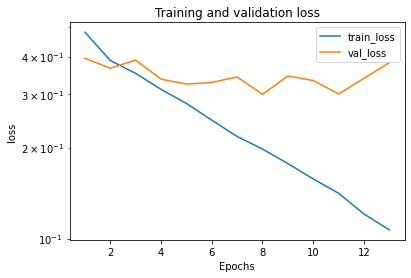

In [290]:
plot_metric(history_c1,'loss')

In [270]:
def model_performance_class(y_train, y_pred_train, y_test, y_pred_test):

    from sklearn.metrics import cohen_kappa_score, classification_report 


    print("Results obtained for the TRAIN SET")
    print("==================================")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_train, y_pred_train)))
    print(classification_report(y_train, y_pred_train))
    print("==================================")
    print("Results obtained for the TEST SET")
    print("The Cohen's Kappa is: {:.2f}".format(cohen_kappa_score(y_test, y_pred_test)))
    print(classification_report(y_test, y_pred_test))

In [291]:
y_pred_train_c1 = model_c1.predict(X_train_up) # This provides the probability for each class
y_pred_test_c1  = model_c1.predict(X_test) # This provides the probability for each class

# We need to extract for each row which is the class which the highest probability
# which corresponds to the index of the sublist
y_pred_train_c1 = np.argmax(y_pred_train_c1, axis=1).reshape(-1,1)
y_pred_test_c1  = np.argmax(y_pred_test_c1, axis=1).reshape(-1,1)

model_performance_class(y_train_label, y_pred_train_c1, y_test_label, y_pred_test_c1)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.89
              precision    recall  f1-score   support

           0       0.98      0.91      0.95      2403
           1       0.92      0.98      0.95      2403

    accuracy                           0.95      4806
   macro avg       0.95      0.95      0.95      4806
weighted avg       0.95      0.95      0.95      4806

Results obtained for the TEST SET
The Cohen's Kappa is: 0.54
              precision    recall  f1-score   support

           0       0.78      0.59      0.67       285
           1       0.82      0.92      0.87       600

    accuracy                           0.81       885
   macro avg       0.80      0.75      0.77       885
weighted avg       0.81      0.81      0.81       885



In [302]:
def create_cla_nn_model(inputs,layer_list= [100,70,50,20,10,2],
                        activations = ['relu','relu','relu','relu','sigmoid','sigmoid'],
                        dropouts = [0.25,0,0],
                        regularizers = [('l1',0.01),('l2',0.01)]):
    '''
    This function creates a neural network with the given amount of layers, neurons,
    activations, dropouts and regularizers.
    Inputs: 
    inputs -> input size. It must be integer
    activations -> a list of activation functions to be used in each layer
    droputs -> a list of dropouts coefficients to be used in each layer except the last one
    regularizers -> a list of regularizers to be used in the last layer. Coefficients should
    be set to zero if no regularizers are wanted.
    Output:
    neural network already compiled with: 'adam' optimizer and 'mse' as the loss.
    '''
    
    model = keras.Sequential()

    my_list = list(zip(layer_list,activations,dropouts))

    for index, elem in enumerate(my_list):
        if ( index == 0 ):      
            model.add(Dense(units = elem[0],input_dim = inputs,activation=elem[1]))
            if ( elem[2] != 0 ):
            # Adding a dropout layer with regularization parameter (it must be between [0,1) )
                model.add(Dropout(elem[2]))
        else:
            model.add(Dense(units = elem[0],activation=elem[1]))
        if ( index == len(my_list) ):
            model.add(Dense(elem[0], activation=elem[1],
                            activity_regularizer=
                            regularizers.l1_l2(l1=regularizers[0][1], l2=regularizers[1][1])))

    # Compile the final network
    model.compile(optimizer='rmsprop', 
              loss='sparse_categorical_crossentropy', 
              metrics=[recall_m] 
              )
    model.summary()

    return model

In [303]:
model_c2 = create_cla_nn_model(X_train_up.shape[1])

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 100)               21800     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_133 (Dense)           (None, 70)                7070      
                                                                 
 dense_134 (Dense)           (None, 50)                3550      
                                                                 
Total params: 32,420
Trainable params: 32,420
Non-trainable params: 0
_________________________________________________________________


In [304]:
checkpoint_path = 'cls-nn2.hdf5'
checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    save_freq='epoch',
    save_weights_only=False,
    verbose=1
)

In [305]:
history_c2 = model_c2.fit(
    X_train_up, 
    y_train_label, 
    epochs=60, 
    validation_split=0.20, 
    batch_size=10, 
    verbose=2,
    callbacks=[early_stopping,checkpoint]
)

Epoch 1/60

Epoch 1: saving model to cls-nn2.hdf5
385/385 - 1s - loss: 0.7750 - recall_m: 0.9002 - val_loss: 0.5207 - val_recall_m: 0.9274 - 1s/epoch - 4ms/step
Epoch 2/60

Epoch 2: saving model to cls-nn2.hdf5
385/385 - 1s - loss: 1.0081 - recall_m: 0.5941 - val_loss: 3.5223 - val_recall_m: 0.0000e+00 - 724ms/epoch - 2ms/step
Epoch 3/60

Epoch 3: saving model to cls-nn2.hdf5
385/385 - 1s - loss: 3.7170 - recall_m: 0.0000e+00 - val_loss: 3.3965 - val_recall_m: 0.0000e+00 - 651ms/epoch - 2ms/step
Epoch 4/60

Epoch 4: saving model to cls-nn2.hdf5
385/385 - 1s - loss: 3.4044 - recall_m: 0.0000e+00 - val_loss: 3.4371 - val_recall_m: 0.0000e+00 - 677ms/epoch - 2ms/step
Epoch 5/60

Epoch 5: saving model to cls-nn2.hdf5
385/385 - 1s - loss: 3.5230 - recall_m: 0.0000e+00 - val_loss: 3.6654 - val_recall_m: 0.0000e+00 - 719ms/epoch - 2ms/step
Epoch 6/60

Epoch 6: saving model to cls-nn2.hdf5
385/385 - 1s - loss: 3.7018 - recall_m: 0.0000e+00 - val_loss: 3.6709 - val_recall_m: 0.0000e+00 - 634ms/

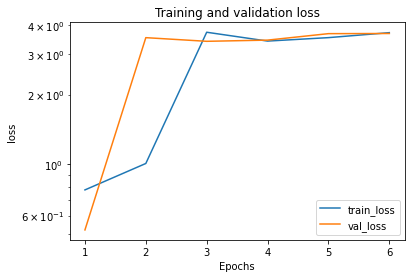

In [306]:
plot_metric(history_c2,'loss')

In [307]:
y_pred_train_c2 = model_c2.predict(X_train_up) # This provides the probability for each class
y_pred_test_c2  = model_c2.predict(X_test) # This provides the probability for each class

# We need to extract for each row which is the class which the highest probability
# which corresponds to the index of the sublist
y_pred_train_c2 = np.argmax(y_pred_train_c2, axis=1).reshape(-1,1)
y_pred_test_c2  = np.argmax(y_pred_test_c2, axis=1).reshape(-1,1)

model_performance_class(y_train_label, y_pred_train_c2, y_test_label, y_pred_test_c2)

Results obtained for the TRAIN SET
The Cohen's Kappa is: 0.01
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2403
           1       1.00      0.01      0.01      2403

    accuracy                           0.50      4806
   macro avg       0.75      0.50      0.34      4806
weighted avg       0.75      0.50      0.34      4806

Results obtained for the TEST SET
The Cohen's Kappa is: 0.00
              precision    recall  f1-score   support

           0       0.32      1.00      0.49       285
           1       1.00      0.01      0.01       600

    accuracy                           0.33       885
   macro avg       0.66      0.50      0.25       885
weighted avg       0.78      0.33      0.17       885

